In [3]:
# Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import RobustScaler
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from statistics import mean,stdev

In [4]:
# Read wine_data.csv using pandas library (pd object)
df = pd.read_csv('./wine_data.csv')

In [5]:
df.columns

Index(['class', 'alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash',
       'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'OD280/OD315_of_diluted_wines', 'proline'],
      dtype='object')

In [6]:
# group wines by class and provide the size of each group
# i.e. how many wines of each type there are in the dataset
df.groupby('class').size()

class
1    59
2    71
3    48
dtype: int64

Text(0.5, 1.0, 'Count of Wines by Class')

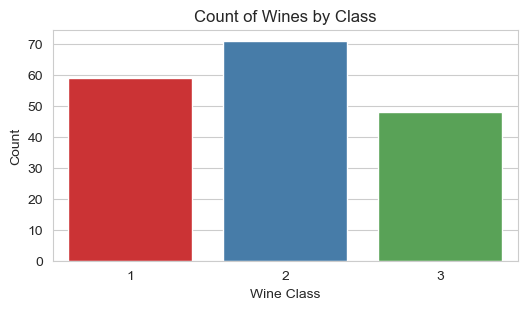

In [7]:
# provide a seaborn countplot on the class column; use the Set1 palette
sns.set_style("whitegrid")
sns.set_palette("Set1")

# Create the countplot
plt.figure(figsize=(6, 3))
sns.countplot(x='class', data=df)

# Adding labels and title
plt.xlabel('Wine Class')
plt.ylabel('Count')
plt.title('Count of Wines by Class')

In [20]:
# print basic statistics per feature
df.describe()

,class,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,OD280/OD315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [9]:
# extract the features and the target variable
X = df.iloc[:, 1:].values      # features (all rows, from the second to the last column)
y = df.iloc[:, 0].values      # target (all rows, only first column)

Best combination (ACC: 0.989): (0, 2, 4, 5, 6, 9, 12)



(<Figure size 600x600 with 1 Axes>,
 <Axes: xlabel='Number of Features', ylabel='Performance'>)

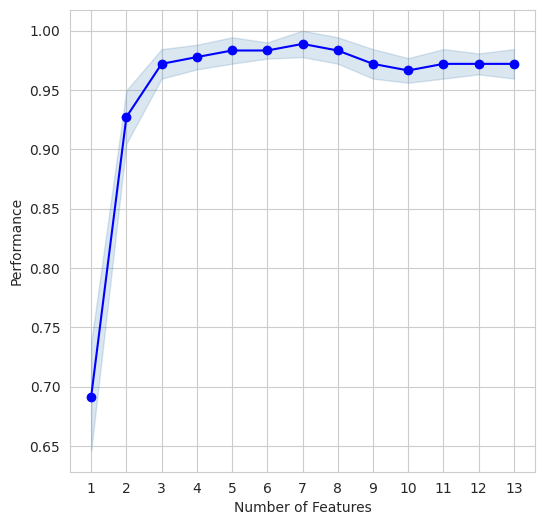

In [22]:
# create a Random Forest Classifier object with default values
rfc = RandomForestClassifier()

# Run sequential forward selection from 1 to 13 features
# ANSWER: Accuracy is a commonly used metric for classification tasks, including in wine classification problems.
#It represents the proportion of correctly classified instances out of the total instances.
#In the context of wine classification, where you're trying to predict the class of the wine based on its attributes,
#accuracy tells you how often your classifier is correctly predicting the wine class.
sfs_range = SFS(estimator=rfc,
                k_features=(1, 13),
                forward=True,
                floating=False,
                scoring='accuracy',
                cv=5)

# Train the sequential forward selection object
sfs_range.fit(X, y)

# Print the accuracy of the best combination as well as the set of best features
print('Best combination (ACC: %.3f): %s\n' % (sfs_range.k_score_, sfs_range.k_feature_idx_))

# Use the plot_sfs to visualize all accuracies
plt.rcParams["figure.figsize"] = (6,6)
plot_sfs(sfs_range.get_metric_dict(), kind='std_err')


In [23]:
# keep the most important features from X dataset that maximize the accuracy
# Generate (transform) the new subsets based on the selected features
X_sfs = sfs_range.transform(X)

In [24]:
# Split X_sfs and y datasets into: training dataset - 80%, test - 20%; set random_state param to 0
X_train, X_test, y_train, y_test = train_test_split(X_sfs, y, test_size=0.2, random_state=0)

In [26]:
# perform grid search CV on a number of classifiers to find the best along with the set of
# its best parameters

# names list is used for printing results purposes
names = [
         "Decision Tree",
         "Random Forest",
         "Ada Boost",
         "Gradient Boosting",
         "K Nearest Neighbors",
         "Gaussian Naive Bayes",
         "Support Vector Machines"
]

classifiers = [
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    KNeighborsClassifier(),
    GaussianNB(),
    SVC()
]

parameters = [
              {'criterion': ['gini', 'entropy'], 'max_depth': [10,20,50]},
              {'n_estimators': [200, 500, 750], 'max_features': ['auto', 'sqrt', 'log2'],
               'max_depth' : [2,3,4], 'criterion' :['gini', 'entropy']},
              {'learning_rate': [0.001, 0.01, 0.025], 'n_estimators': [100, 500, 750]},
              {'learning_rate': [0.001, 0.01, 0.025], 'max_depth':[3,4],
               'max_features': ["log2","sqrt"], 'subsample': [0.8, 0.9, 1.0],
               'n_estimators': [100, 500, 750]},
              {'n_neighbors': [1, 2, 3, 5]},
              {'var_smoothing': np.logspace(0,-9, num=100)},
              {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],
               'kernel': ['rbf', 'poly', 'sigmoid']}
]

# print results
for name, classifier, params in zip(names, classifiers, parameters):
    gs = GridSearchCV(classifier, param_grid=params, scoring='accuracy', n_jobs=-1)
    gs.fit(X_train, y_train)
    print("{} score: {} - best params: {}".format(name, gs.best_score_, gs.best_params_))

Decision Tree score: 0.9507389162561577 - best params: {'criterion': 'gini', 'max_depth': 50}


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Random Forest score: 0.9862068965517242 - best params: {'criterion': 'gini', 'max_depth': 2, 'max_features': 'auto', 'n_estimators': 200}
Ada Boost score: 0.9650246305418719 - best params: {'learning_rate': 0.01, 'n_estimators': 500}
Gradient Boosting score: 1.0 - best params: {'learning_rate': 0.001, 'max_depth': 4, 'max_features': 'sqrt', 'n_estimators': 500, 'subsample': 0.8}
K Nearest Neighbors score: 0.767487684729064 - best params: {'n_neighbors': 1}
Gaussian Naive Bayes score: 0.9790640394088671 - best params: {'var_smoothing': 2.848035868435799e-06}
Support Vector Machines score: 0.9440886699507389 - best params: {'C': 0.1, 'gamma': 0.001, 'kernel': 'poly'}


In [27]:
# create a model involving the estimator along with its best parameters obtained by the
# process above
best_classifier = RandomForestClassifier(**{'criterion': 'gini', 'max_depth': 2, 'max_features': 'auto', 'n_estimators': 200})
# Train the model
best_classifier.fit(X_train, y_train)
# Predict the output of the X_test dataset
y_pred = best_classifier.predict(X_test)
# Print the accuracy of the model on the unseen data
print("Final accuracy on unseen data:", accuracy_score(y_pred, y_test))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Final accuracy on unseen data: 0.9444444444444444
